In [1]:
import librosa
import numpy as np
from scipy.fftpack import dct
import os 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import wave
import math
import scipy.io.wavfile as wav
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import json

In [2]:
def load_data(data_dir):
    real_files = [os.path.join(data_dir, "real", f) for f in os.listdir(os.path.join(data_dir, "real")) if f.endswith(".wav")]
    fake_files = [os.path.join(data_dir, "fake", f) for f in os.listdir(os.path.join(data_dir, "fake")) if f.endswith(".wav")]
    fake_labels = [0] * len(fake_files)
    real_labels = [1] * len(real_files)

    files = fake_files + real_files
    labels = fake_labels + real_labels

    return files, labels

In [12]:

def preprocessing(audio_file, n_features):
    # Load the audio signal
    y, sr = librosa.load(audio_file, sr=None)

    # Step 1: Pre-emphasis
    pre_emphasis_coeff = 0.97
    y_filt = librosa.effects.preemphasis(y, coef=pre_emphasis_coeff)

    # Step 2: Frame blocking
    frame_length = 0.025  # 25 ms
    hop_length = 0.01  # 10 ms
    frame_length_samples = int(frame_length * sr)
    hop_length_samples = int(hop_length * sr)
    frames = librosa.util.frame(y_filt, frame_length=frame_length_samples, hop_length=hop_length_samples)

    # Step 3: Windowing
    window = np.hamming(len(frames))
    windowed_frames = frames * window[:, np.newaxis]
    
    # Step 4: Fast Fourier Transform (FFT)
    fft_size = 2048
    spectrogram = np.abs(np.fft.rfft(windowed_frames, n=fft_size, axis=0))

    # Step 5: Mel frequency wrapping
    n_mels = 40  # Adjusted number of Mel bands
    mel_spec = librosa.feature.melspectrogram(S=spectrogram, sr=sr, n_mels=n_mels)
    
    # Step 6: Discrete Cosine Transform (DCT) to get MFCC
    n_mfcc = n_features  # Use the desired number of MFCC features
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel_spec), sr=sr, n_mfcc=n_mfcc)

    mean_mfcc = np.max(mfcc, axis=1)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Reshape the aggregated MFCCs to 2D (needed for fitting the scaler)
    mean_mfcc_reshaped = mean_mfcc.reshape(-1, 1)

    # Fit and transform the data
    mean_mfcc_scaled = scaler.fit_transform(mean_mfcc_reshaped)

    # Flatten the scaled data back to 1D
    mean_mfcc_scaled_flat = mean_mfcc_scaled.flatten()

    return mean_mfcc_scaled_flat
#code 9x accu


In [15]:
def load_data(data_dir):
    real_files = [os.path.join(data_dir, "real_an", f) for f in os.listdir(os.path.join(data_dir, "real_an")) if f.endswith(".wav")]
    fake_files = [os.path.join(data_dir, "fake_an", f) for f in os.listdir(os.path.join(data_dir, "fake_an")) if f.endswith(".wav")]
    fake_labels = [0] * len(fake_files)
    real_labels = [1] * len(real_files)

    files = fake_files + real_files
    labels = fake_labels + real_labels
    print(len(fake_files))
    print(len(real_files))
    return files, labels

In [16]:
url = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly"
files, labels = load_data(url)

X_train, X_test, y_train, y_test = train_test_split(files, labels, test_size=0.2, random_state=42)

X_train = [preprocessing(file,68) for file in X_train]
X_test = [preprocessing(file,68) for file in X_test]

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Create a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    GaussianNB()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier.__class__.__name__}: Accuracy = {accuracy}")

539
1459
LogisticRegression: Accuracy = 0.9875
DecisionTreeClassifier: Accuracy = 0.9925
SVC: Accuracy = 0.98
RandomForestClassifier: Accuracy = 1.0


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: Accuracy = 0.995
KNeighborsClassifier: Accuracy = 1.0
GaussianNB: Accuracy = 0.9575


In [17]:
print(len(X_test))

400


In [18]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

1.0

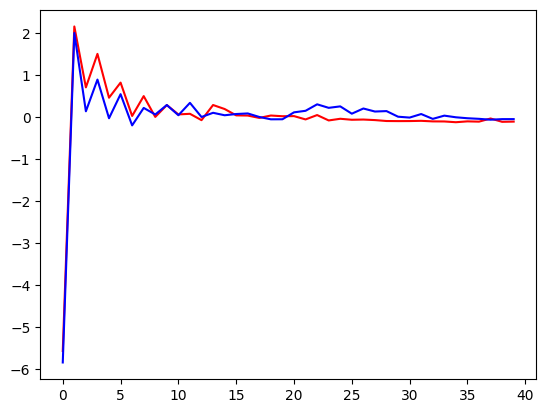

In [19]:
file_r = r"c:\Users\VIET HOANG - VTS\Desktop\tien xu ly\real\r_5.wav"
file_f = r"c:\Users\VIET HOANG - VTS\Desktop\tien xu ly\fake\f_5.wav"
plt.plot([i for i in range(40)],preprocessing(file_f,68),color = 'r')
plt.plot([i for i in range(40)],preprocessing(file_r,68),color = 'blue')
plt.show()